In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [18]:
def world2image(traj_w, H_inv):    
    # Converts points from Euclidean to homogeneous space, by (x, y) → (x, y, 1)
    traj_homog = np.hstack((traj_w, np.ones((traj_w.shape[0], 1)))).T  
    # to camera frame
    traj_cam = np.matmul(H_inv, traj_homog)  
    # to pixel coords
    traj_uvz = np.transpose(traj_cam/traj_cam[2]) 
    return traj_uvz[:, :2].astype(int)    

In [2]:
OPENTRAJ_ROOT = "/home/linsea/motion_ws/src/motion_prediction/data/ETH_v1/"
train_y = "043.csv"

In [20]:
df = pd.read_csv(OPENTRAJ_ROOT+train_y)
pt = [[df['pos_x'][0], df['pos_y'][0]]]
print(pt)

[[10.12976, 6.1672099]]


In [21]:

H = (np.loadtxt(os.path.join(OPENTRAJ_ROOT, "H.txt")))
H_inv = np.linalg.inv(H)
convert_pt = world2image(np.array(pt), H_inv)  # TRAJ: Tx2 numpy array
print(convert_pt)

[[365 340]]


In [22]:
img = cv2.imread(OPENTRAJ_ROOT+"map.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
for i in range(len(df)):
  pt = [[df['pos_x'][i], df['pos_y'][i]]]
  H = (np.loadtxt(os.path.join(OPENTRAJ_ROOT, "H.txt")))
  H_inv = np.linalg.inv(H)
  convert_pt = world2image(np.array(pt), H_inv)  # TRAJ: Tx2 numpy array
  color = (0, 0, int(df['agent_id'][i]*2))
  # img = cv2.circle(img, (convert_pt[0][1], convert_pt[0][0]), radius=1, color = color,thickness=-1)
# img.shape
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [23]:
img.shape

(480, 640)

In [26]:
def get_map_feature(center_pt, map, cut_size=30):
  x = center_pt[1]
  y = center_pt[0]
  helf_size = int(cut_size/2)
  map_feature = []
  for i in range(x - helf_size, x + helf_size):
    for j in range(y - helf_size, y + helf_size):
      map_feature.append(map[i][j])
  map_feature = np.array(map_feature).reshape(cut_size, cut_size)
  return np.array(map_feature)
feature = get_map_feature([500,300], img)
feature.shape

(30, 30)

TypeError: imshow() missing 1 required positional argument: 'X'

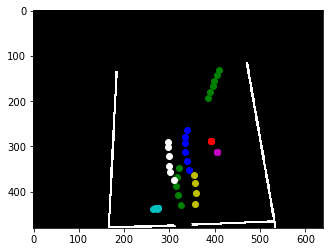

In [16]:
img = mpimg.imread(OPENTRAJ_ROOT+'map.png')
implot = plt.imshow(img, cmap='gray')
c = ['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']

for i in range(len(df)):
  pt = [[df['pos_x'][i], df['pos_y'][i]]]
  H = (np.loadtxt(os.path.join(OPENTRAJ_ROOT, "H.txt")))
  H_inv = np.linalg.inv(H)
  convert_pt = world2image(np.array(pt), H_inv)  # TRAJ: Tx2 numpy array
  color = int(df['agent_id'][i]%8)
  img = plt.scatter(convert_pt[0][1], convert_pt[0][0], c=c[color])
plt.imshow()

TypeError: 'PathCollection' object is not subscriptable

In [3]:
def get_map_feature_ETH(center_pt, map, h, cut_size=30):
  pt = traj2pixal(center_pt, h)
  x = pt[0][1]
  y = pt[0][0]
  helf_size = int(cut_size/2)
  map_feature = []
  for i in range(x - helf_size, x + helf_size):
    for j in range(y - helf_size, y + helf_size):
      print(i, j)
      map_feature.append(map[i][j])
  map_feature = np.array(map_feature).reshape(cut_size, cut_size)
  return map_feature

def traj2pixal(traj,h):
  # h = (np.loadtxt(os.path.join(path_H)))
  h_inv = np.linalg.inv(h)
  traj_homog = np.hstack((traj, np.ones((traj.shape[0], 1)))).T
  traj_cam = np.matmul(h_inv, traj_homog)  
  traj_uvz = np.transpose(traj_cam/traj_cam[2])
  return traj_uvz[:, :2].astype(int)    